In [ ]:
!pip install transformers

     |████████████████████████████████| 3.1 MB 5.6 MB/s 
     |████████████████████████████████| 596 kB 50.5 MB/s 
     |████████████████████████████████| 59 kB 4.7 MB/s 
     |████████████████████████████████| 3.3 MB 35.8 MB/s 
     |████████████████████████████████| 895 kB 52.0 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


Feature Extraction

In [ ]:
import numpy as np
from transformers import AutoTokenizer, AutoModel, pipeline

model = AutoModel.from_pretrained('bert-base-uncased')
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
fe = pipeline('feature-extraction', model=model, tokenizer=tokenizer)

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

In [ ]:
import numpy as np
import pandas as pd
import os
import re
import nltk
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Load Data

os.chdir('/content/drive/MyDrive/Colab Data/PLP Project')
reviews = pd.read_csv("googleplaystore_user_reviews.csv")
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [ ]:
reviews.head(20)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
5,10 Best Foods for You,Best way,Positive,1.000000,0.300000
6,10 Best Foods for You,Amazing,Positive,0.600000,0.900000
7,10 Best Foods for You,NaN,NaN,NaN,NaN
8,10 Best Foods for You,"Looking forward app,",Neutral,0.000000,0.000000
9,10 Best Foods for You,It helpful site ! It help foods get !,Neutral,0.000000,0.000000


In [ ]:
# Drop rows without Review

reviews = reviews.dropna()
reviews.head(20)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
5,10 Best Foods for You,Best way,Positive,1.000000,0.300000
6,10 Best Foods for You,Amazing,Positive,0.600000,0.900000
8,10 Best Foods for You,"Looking forward app,",Neutral,0.000000,0.000000
9,10 Best Foods for You,It helpful site ! It help foods get !,Neutral,0.000000,0.000000
10,10 Best Foods for You,good you.,Positive,0.700000,0.600000
11,10 Best Foods for You,Useful information The amount spelling errors ...,Positive,0.200000,0.100000


In [ ]:
#Check number of rows after removing NAN
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37427 entries, 0 to 64230
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     37427 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37427 non-null  object 
 3   Sentiment_Polarity      37427 non-null  float64
 4   Sentiment_Subjectivity  37427 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.7+ MB


Positive    23998
Negative     8271
Neutral      5158
Name: Sentiment, dtype: int64

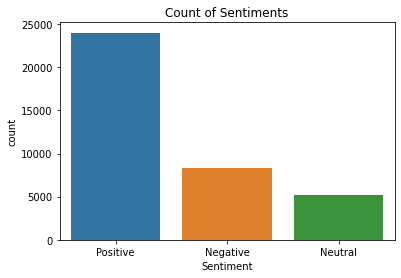

In [ ]:
#Check Sentiment Count
sns.countplot(reviews.Sentiment,order=reviews['Sentiment'].value_counts().index)
plt.title("Count of Sentiments")
reviews.Sentiment.value_counts()

In [ ]:
#Clean Data

def prepare(reviews):
    CleanData=[]

    for descr in reviews.Translated_Review:
        descr=re.sub("[^a-zA-Z]"," ",descr) 
        descr=descr.lower()
        descr = nltk.word_tokenize(descr)
        descr = [word for word in descr if not word in set(stopwords.words("english"))] 
        lemma = nltk.WordNetLemmatizer()
        descr = [lemma.lemmatize(word) for word in descr]
        descr = " ".join(descr)
        CleanData.append(descr)
    return CleanData
    
CleanData=prepare(reviews)

In [ ]:
#bag of words
from sklearn.feature_extraction.text import CountVectorizer
max_features=1000
cou_vec=CountVectorizer(max_features=max_features)
sparce_matrix=cou_vec.fit_transform(CleanData).toarray()
all_words=cou_vec.get_feature_names()
print("Most used 50 words: ",all_words[0:50])

Most used 50 words:  ['ability', 'able', 'absolutely', 'access', 'account', 'accurate', 'across', 'action', 'activity', 'actual', 'actually', 'ad', 'add', 'added', 'addicted', 'addicting', 'addictive', 'adding', 'adobe', 'advert', 'advertisement', 'age', 'ago', 'alarm', 'alert', 'allow', 'allows', 'almost', 'along', 'alot', 'already', 'also', 'although', 'always', 'amazing', 'amazon', 'amount', 'android', 'angry', 'anime', 'annoying', 'another', 'answer', 'anymore', 'anyone', 'anything', 'anyway', 'anywhere', 'app', 'appear']


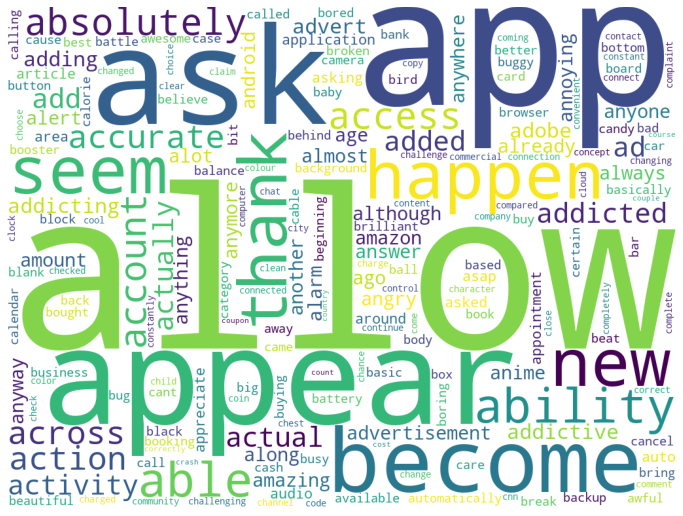

In [ ]:
from wordcloud import WordCloud
plt.subplots(figsize=(12,12))
wordcloud=WordCloud(background_color="white",width=1024,height=768).generate(" ".join(all_words[:]))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
#Split data

X = sparce_matrix
y = reviews['Sentiment'].values

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = np.array(label_encoder.fit_transform(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 10, random_state=42)
rf.fit(X_train,y_train)
print("accuracy: ",rf.score(X_test,y_test))

accuracy:  0.8867218808442426


In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
print("Logistics Regression accuracy: ",lr.score(X_test,y_test))

Logistics Regression accuracy:  0.8946032594175795


BiLSTM Classifier

In [ ]:
!pip install plot_keras_history

  Created wheel for plot-keras-history: filename=plot_keras_history-1.1.29-py3-none-any.whl size=8613 sha256=4d67b1046916f76085f97ef1d013413d1aba58190ea8f459163c6d430b4fc036
  Stored in directory: /root/.cache/pip/wheels/9e/2e/42/17cb826d143226e4d081aa33d3a9b9a90f234dfcf409824b87
  Created wheel for sanitize-ml-labels: filename=sanitize_ml_labels-1.0.26-py3-none-any.whl size=7612 sha256=e985e029ca9126303dd296d779da0e6c209b2d84af3c1ee4ac49dd786839f2f9
  Stored in directory: /root/.cache/pip/wheels/15/65/34/2e11a0da3cf6f112da5c402e01c454be619ff85a0fb38b3018
  Created wheel for compress-json: filename=compress_json-1.0.4-py3-none-any.whl size=4585 sha256=4d3204b730013f32975cf8fdd8db5f7f1164c2c7c755d8d134dbde402191b8f7
  Stored in directory: /root/.cache/pip/wheels/1e/ef/1e/5d403c5632b0462471a8d26049d0c138134d0255ec60ce4c14
Successfully built plot-keras-history sanitize-ml-labels compress-json


In [ ]:
#Seed Random Numbers with the TensorFlow Backend
# from numpy.random import seed
# seed(1)
# from tensorflow import set_random_seed
# set_random_seed(2)

In [ ]:
from __future__ import print_function
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from keras.preprocessing.text import Tokenizer, one_hot
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from plot_keras_history import plot_history

<Figure size 432x288 with 0 Axes>

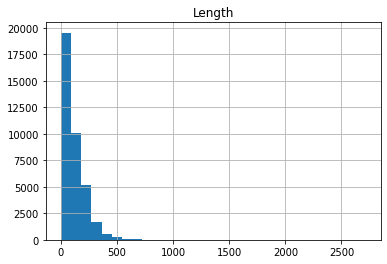

<Figure size 432x288 with 0 Axes>

In [ ]:
##check the length to determine the document length for DNN

length=reviews['Translated_Review'].apply(len)
reviews=reviews.assign(Length=length)

# #Plot the distribution of the document length for each category

reviews.hist(column='Length',bins=30)

plt.figure()

In [ ]:
type(CleanData)

list

In [ ]:
#Data Preprocessing 

# X= reviews["Translated_Review"]

X = CleanData
# Split train & test
text_train, text_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(text_train)
X_train = tokenizer.texts_to_sequences(text_train)
X_test = tokenizer.texts_to_sequences(text_test)

word_index = tokenizer.word_index
vocab_size = len(word_index) + 1  # Adding 1 because of reserved 0 index
maxlen = max(len(x) for x in X_train) # longest text in train set
print('vocabubary size:',vocab_size)
print('max length text:',maxlen)

#fixed length for improved efficiency
MAX_LEN=400 
maxlen=MAX_LEN

#Padding the sentences
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

#embedding dimension should align with the GLOVE
embedding_dim = 100
vocab_size = len(word_index) + 1

GLOVE_6B_100D_PATH ="/content/drive/MyDrive/Colab Data/PLP Project/glove.6B.100d.txt"
encoding="utf-8"
with open(GLOVE_6B_100D_PATH, "rb") as lines:
    embeddings_index = {line.split()[0].decode(encoding): np.array(line.split()[1:],dtype=np.float32)
               for line in lines}

# Prepare embedding matrix from pre-trained model
embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))

for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

# Check % words with embeddings 
nonzero_elements = np.count_nonzero(np.count_nonzero(embedding_matrix, axis=1))
print(nonzero_elements / vocab_size) 

vocabubary size: 15347
max length text: 301
0.8333876327621034


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(y)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

In [ ]:
#Define the BiLSTM model with output Dropout
##############################################
model_out_dp = Sequential()
model_out_dp.add(Embedding(vocab_size, embedding_dim, input_length=maxlen,weights=[embedding_matrix],trainable=False))
model_out_dp.add(Bidirectional(LSTM(64)))
#output Dropout
model_out_dp.add(Dropout(0.5))
model_out_dp.add(Dense(8, activation='softmax'))

# try using different optimizers and different optimizer configs
model_out_dp.compile('adam', 'sparse_categorical_crossentropy', metrics=['accuracy'])
model_out_dp.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 400, 100)          1534700   
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              84480     
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 8)                 1032      
                                                                 
Total params: 1,620,212
Trainable params: 85,512
Non-trainable params: 1,534,700
_________________________________________________________________


Train...
Epoch 1/10
410/410 [==============================] - 260s 624ms/step - loss: 0.6782 - accuracy: 0.7214 - val_loss: 0.4923 - val_accuracy: 0.8001
Epoch 2/10
410/410 [==============================] - 254s 619ms/step - loss: 0.4781 - accuracy: 0.8131 - val_loss: 0.4202 - val_accuracy: 0.8328
Epoch 3/10
410/410 [==============================] - 253s 617ms/step - loss: 0.4269 - accuracy: 0.8353 - val_loss: 0.3927 - val_accuracy: 0.8460
Epoch 4/10
410/410 [==============================] - 252s 615ms/step - loss: 0.3950 - accuracy: 0.8487 - val_loss: 0.3666 - val_accuracy: 0.8595
Epoch 5/10
410/410 [==============================] - 255s 623ms/step - loss: 0.3644 - accuracy: 0.8633 - val_loss: 0.3503 - val_accuracy: 0.8635
Epoch 6/10
410/410 [==============================] - 254s 619ms/step - loss: 0.3421 - accuracy: 0.8724 - val_loss: 0.3361 - val_accuracy: 0.8718
Epoch 7/10
410/410 [==============================] - 257s 626ms/step - loss: 0.3176 - accuracy: 0.8846 - val_loss:

(<Figure size 720x360 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f56d7c4e590>,
       dtype=object))

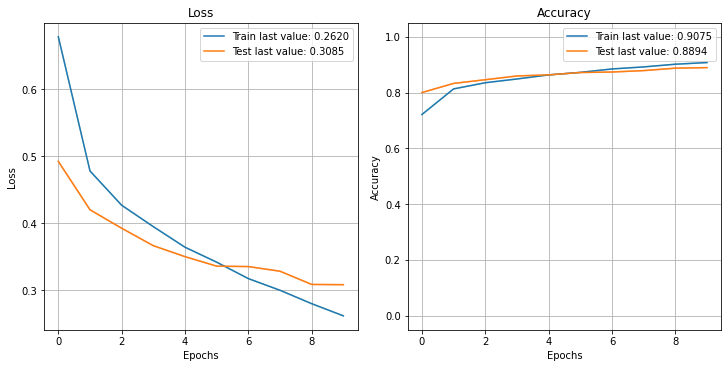

In [ ]:
#Train the model
batch_size = 64

print('Train...')
hist_out_dp = model_out_dp.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=10,
          validation_data=[X_test, y_test]).history

loss, accuracy = model_out_dp.evaluate(X_train, y_train, verbose=True)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model_out_dp.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(hist_out_dp)